# Análise ROC das abordagens utilizadas para deteção de eventos


In [1]:
# imports
%matplotlib inline
import pandas
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc,accuracy_score,precision_score,recall_score,confusion_matrix
import matplotlib.pyplot as plt
import itertools
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold
import datetime
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from estatisticas_time_serie import generate_datasets,general_forecasting, get_forecasts,smooth, fit_lstm,calculate_metrics,reject_outliers, noise_generator, train_model_noise_detection, evaluate_model

from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
sensores = [
    '690g-pressao_entrada-vila-aurea-20-04-2016.csv',
    '735g-pressao_media-vila-aurea-20-04-2016.csv',
    '605g-pressao_alta-vila-aurea-20-04-2016.csv',
    '589g-pressao_alta-andreazza-20-04-2016.csv',
    '631g-pressao_ponto_critico-andreazza-20-04-2016.csv',
    '678g-pressao_entrada-andreazza-20-04-2016.csv',
    '690a-vazao-vila-aurea-20-04-2016.csv',
    '450a-vazao-santa-izabel-20-04-2016.csv',
    '450g-pressao_entrada-santa-izabel-20-04-2016.csv',
    '485b-vazao-reno-20-04-2016.csv',
    '485g-pressao_entrada-reno-20-04-2016.csv',
    '525g-pressao_baixa-reno-20-04-2016.csv',
    '573g-pressao_alta-aeroporto-20-04-2016.csv',
    '635g-pressao_ponto_critico-aeroporto-20-04-2016.csv',
    '781a-vazao-aeroporto-20-04-2016.csv',
    '781g-pressao_entrada-aeroporto-20-04-2016.csv',
    '801g-pressao_alta-reno-20-04-2016.csv',
    '830g-pressao_baixa-santa-izabel-20-04-2016.csv',
    '831g-pressao_alta-santa-izabel-20-04-2016.csv'
]

dataframes = []
dataframes_ruidos,inicios_ruidos,inicios_sem_ruidos = [],[],[]
dataframes_ruidos2,inicios_ruidos2,inicios_sem_ruidos2 = [],[],[]

# lendo dados dos sensores
for item in sensores:
    # lendo csv
    dataframe = pandas.read_csv(item, engine='python', skipfooter=3)
    data_matrix = dataframe.as_matrix()
    # removendo valores nulos
    data_matrix = data_matrix[340519:,2:]
    #data_matrix = data_matrix[:,2:]

    data_convolution = np.array(data_matrix).ravel()

    newV=[]
    for idx,val in enumerate(data_convolution):
        # checking
        if not data_convolution[idx] == 'null' and not np.isnan(data_convolution[idx]): 
            newV.append(float(data_convolution[idx]))

    newV = np.array(newV)
    newV = reject_outliers(newV,m=1)
    # se for vazao, suavizar
    if not (item.split('-')[0][-1] == 'g'):
        newV = smooth(newV, 10, window='hanning')
    
    # adicionando ao array de dataframes e salvando inicio e fim dos ruidos
    dataframes.append(newV)
    train_size = int(len(newV) * 0.8)
    data_noised = newV[train_size:]
    
    data_ruido, inicio_ruidos, inicio_sem_ruidos = noise_generator(data_noised)
    data_ruido_two_way, inicio_ruidos_two_way, inicio_sem_ruidos_two_way = noise_generator(data_noised,two_way=True)
    
    dataframes_ruidos.append(data_ruido)
    dataframes_ruidos2.append(data_ruido_two_way)
    inicios_ruidos.append(inicio_ruidos)
    inicios_sem_ruidos.append(inicio_sem_ruidos)
    inicios_ruidos2.append(inicio_ruidos_two_way)
    inicios_sem_ruidos2.append(inicio_sem_ruidos_two_way)

('sensor : ', '690g-pressao_entrada-vila-aurea-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


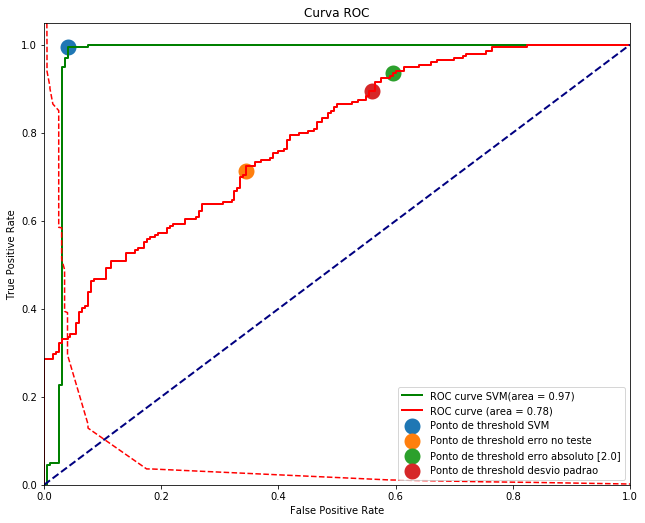

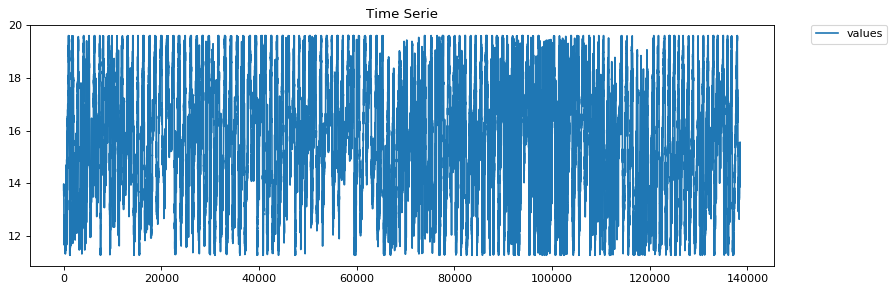

('sensor : ', '735g-pressao_media-vila-aurea-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 1.0, 'classify__gamma': 0.1}


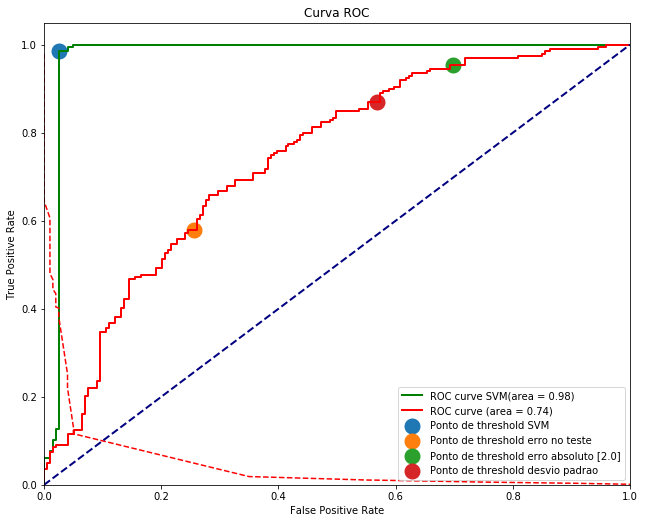

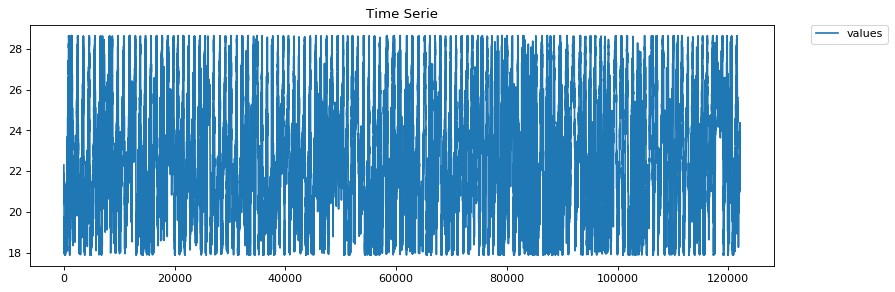

('sensor : ', '605g-pressao_alta-vila-aurea-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


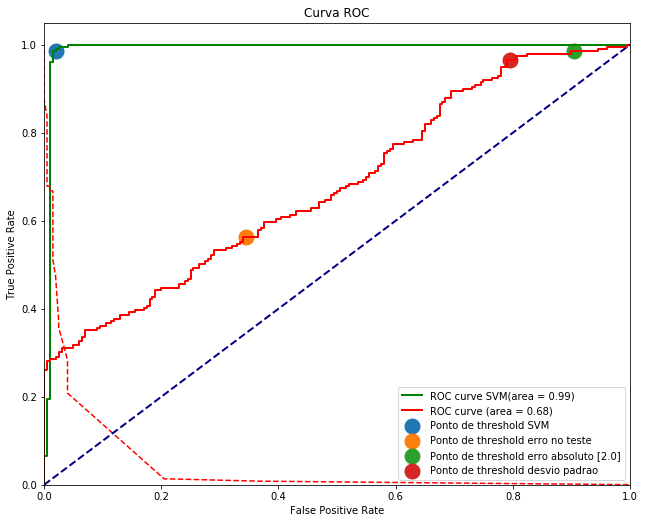

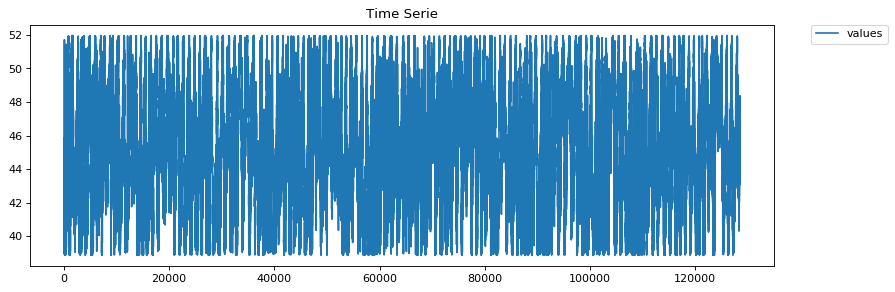

('sensor : ', '589g-pressao_alta-andreazza-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


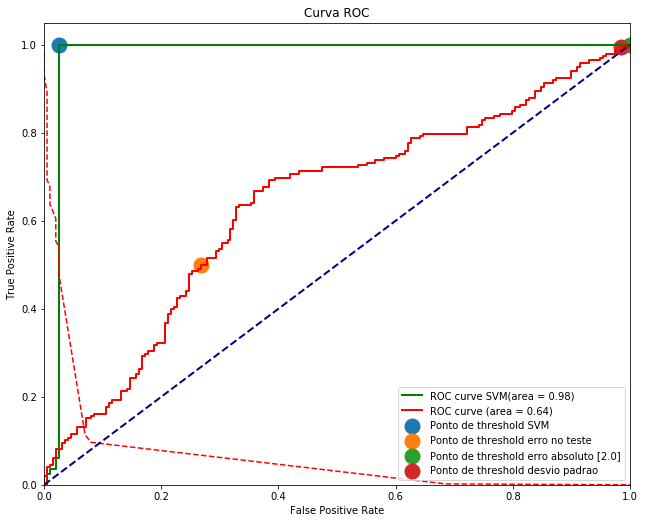

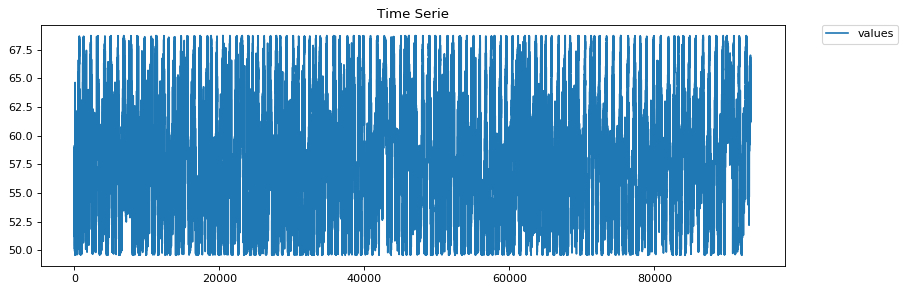

('sensor : ', '631g-pressao_ponto_critico-andreazza-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


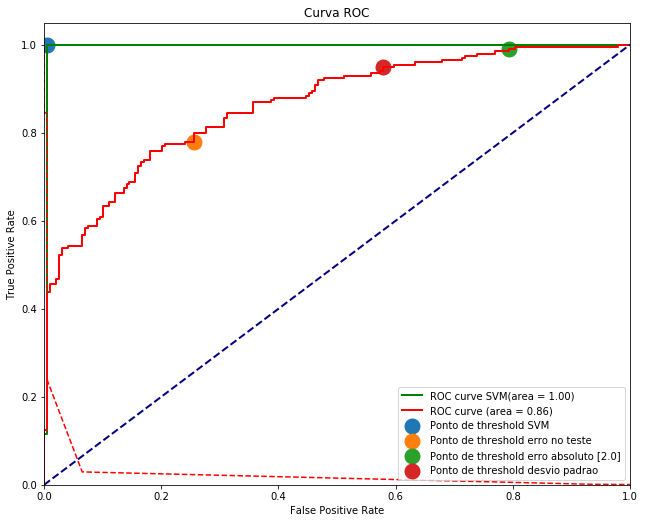

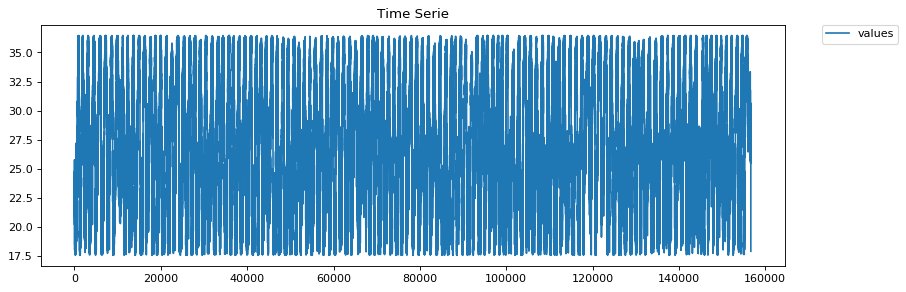

('sensor : ', '678g-pressao_entrada-andreazza-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


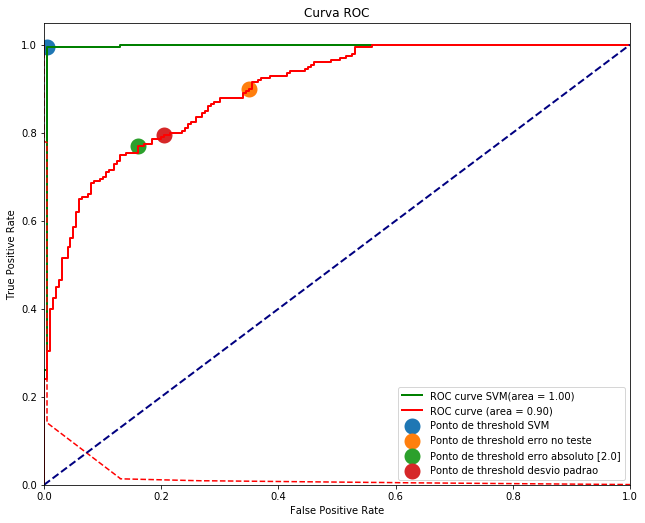

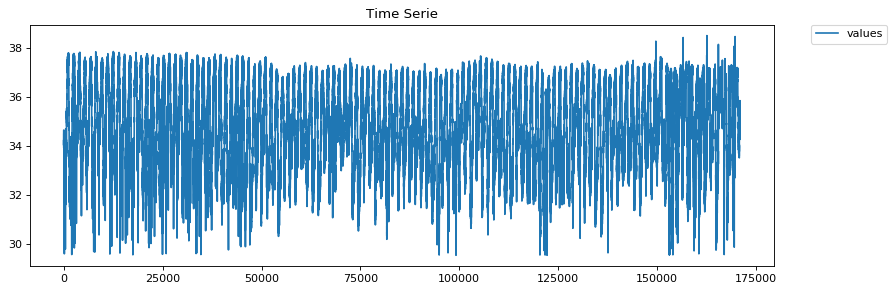

('sensor : ', '690a-vazao-vila-aurea-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


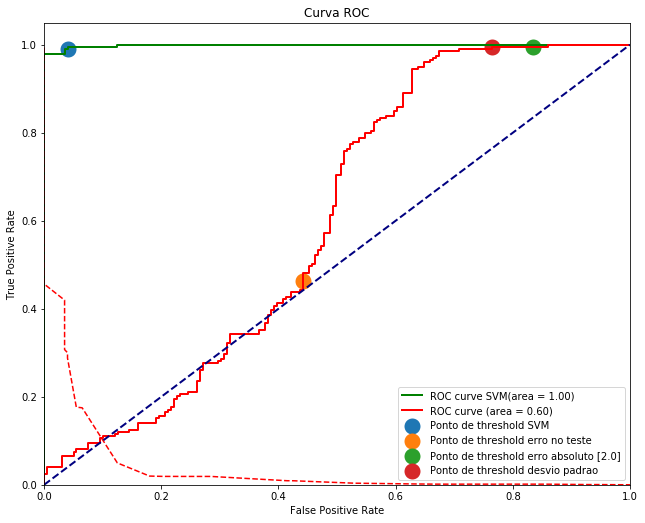

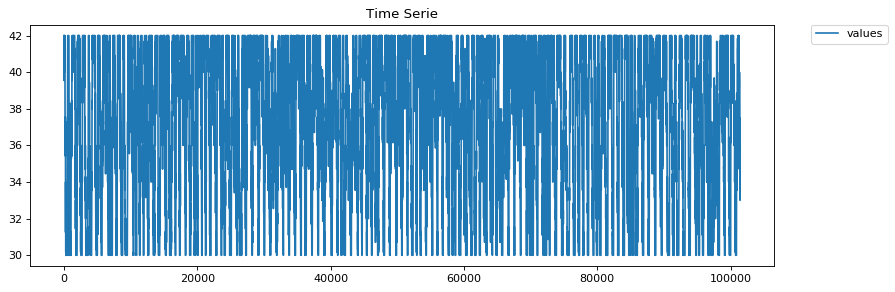

('sensor : ', '450a-vazao-santa-izabel-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


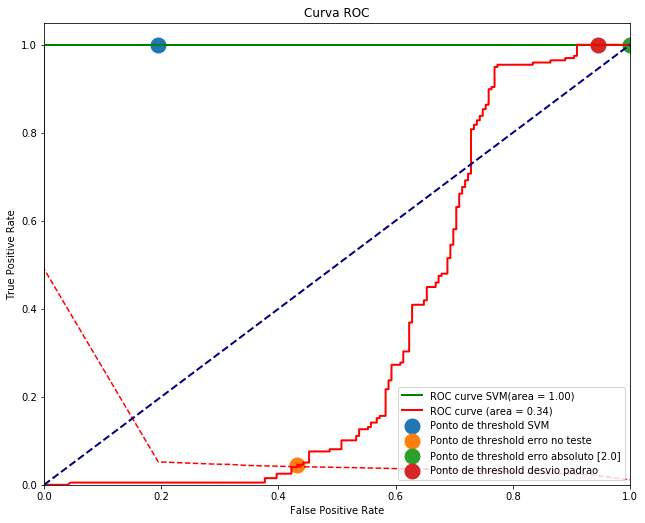

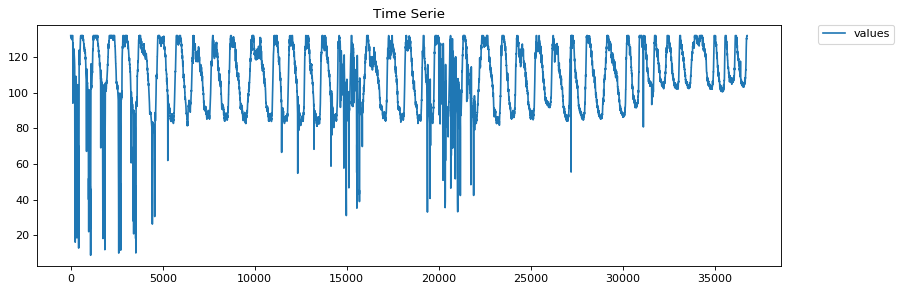

('sensor : ', '450g-pressao_entrada-santa-izabel-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


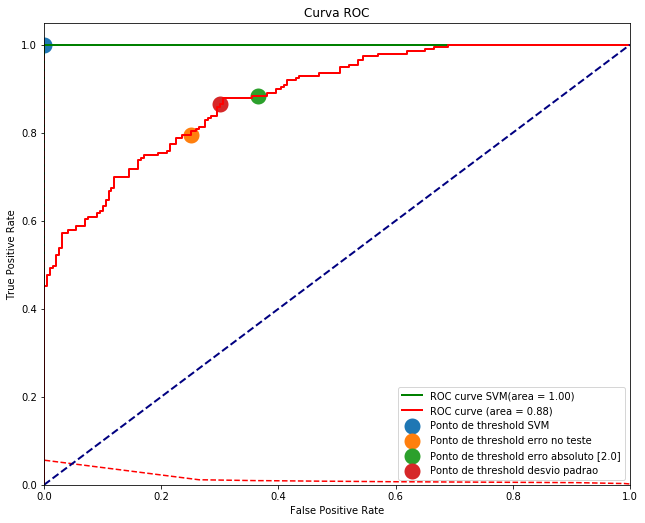

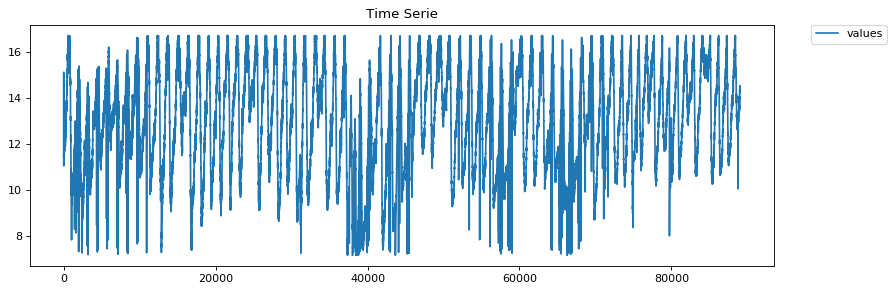

('sensor : ', '485b-vazao-reno-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


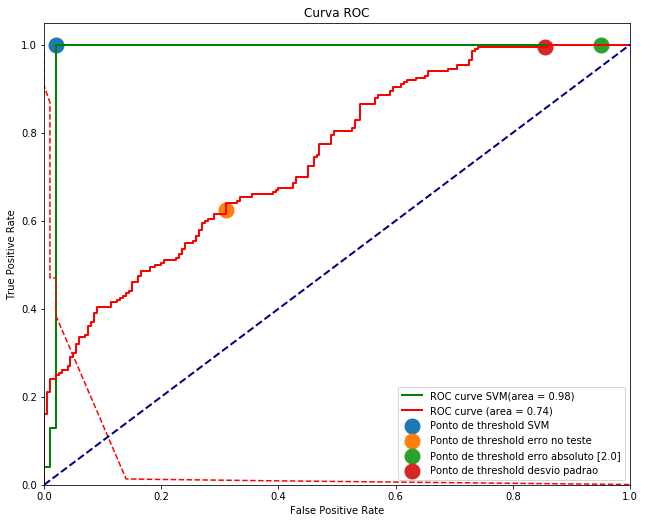

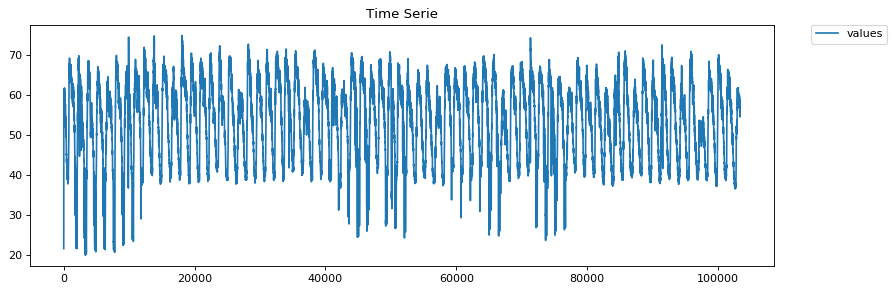

('sensor : ', '485g-pressao_entrada-reno-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


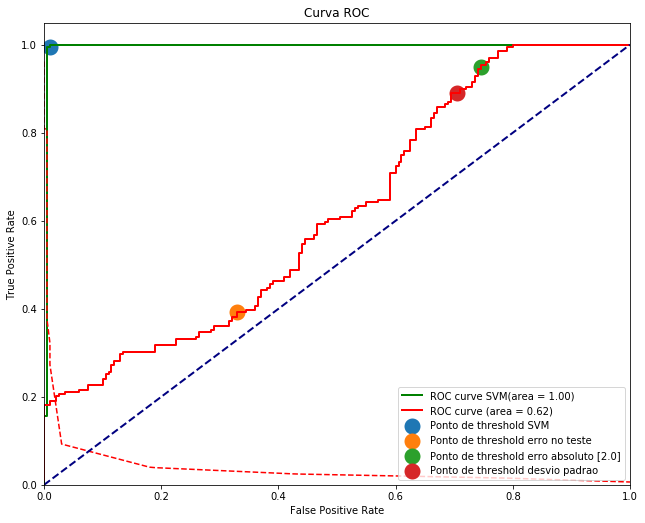

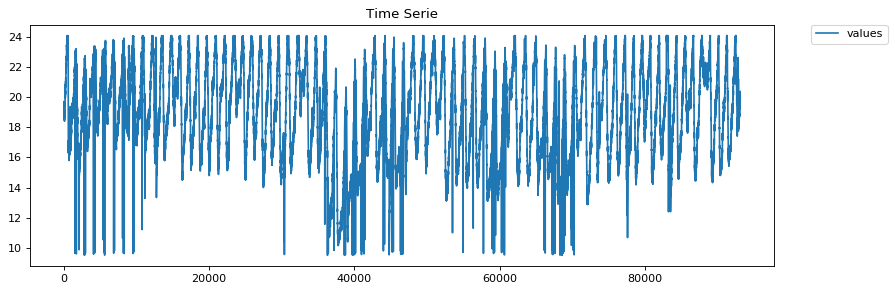

('sensor : ', '525g-pressao_baixa-reno-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


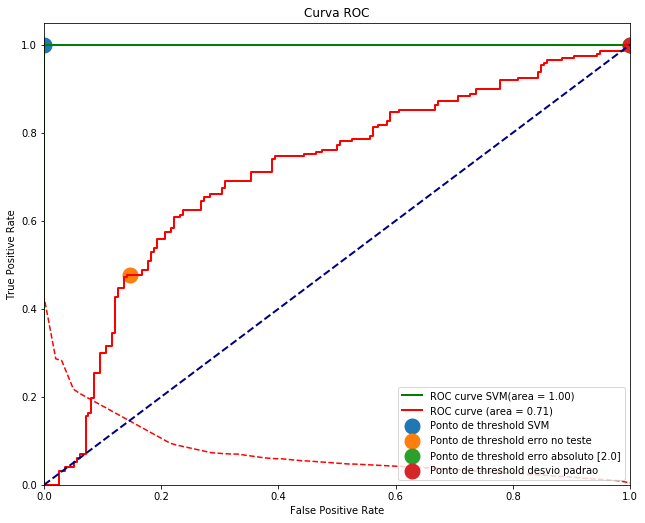

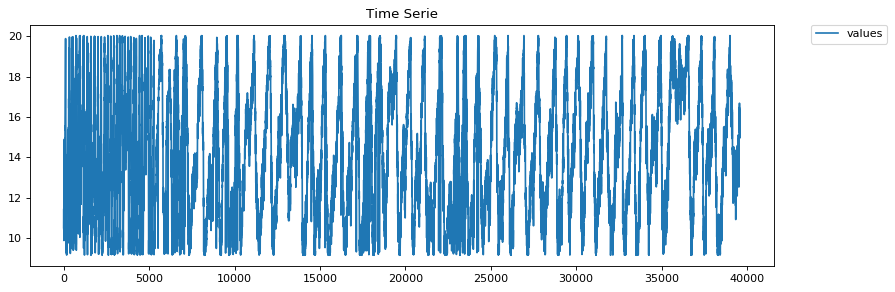

('sensor : ', '573g-pressao_alta-aeroporto-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


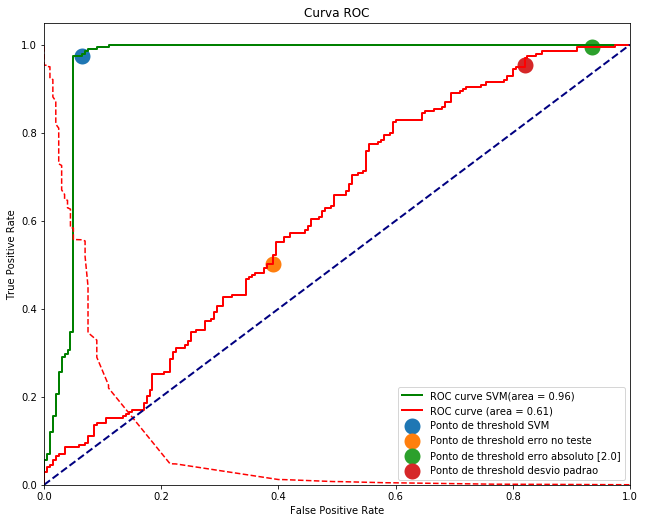

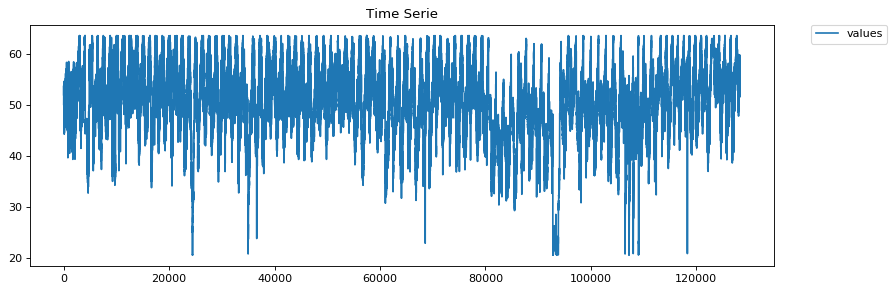

('sensor : ', '635g-pressao_ponto_critico-aeroporto-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 1.0, 'classify__gamma': 0.1}


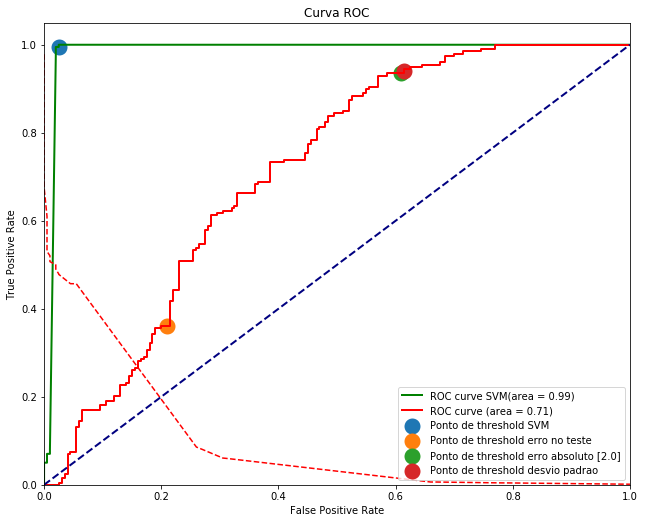

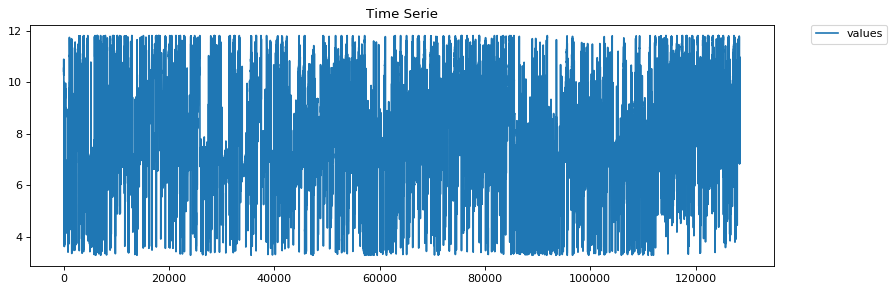

('sensor : ', '781a-vazao-aeroporto-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


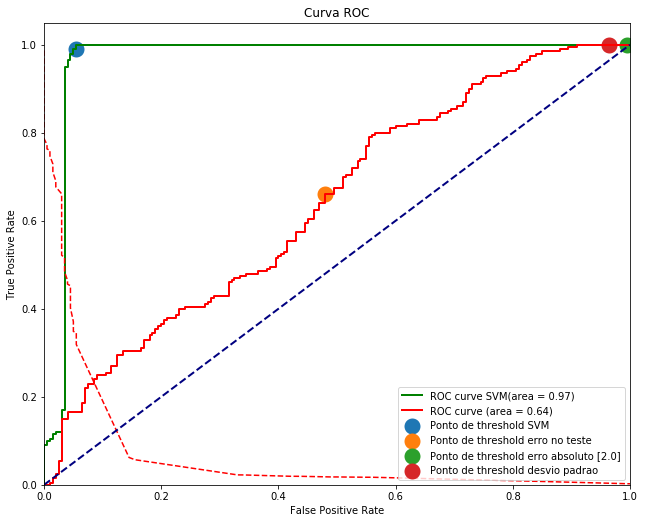

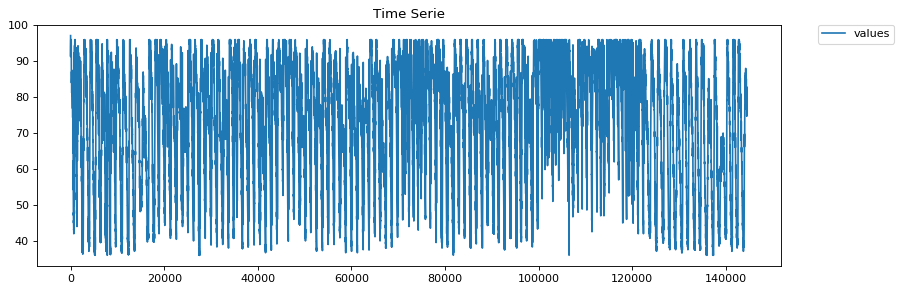

('sensor : ', '781g-pressao_entrada-aeroporto-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 1.0, 'classify__gamma': 0.1}


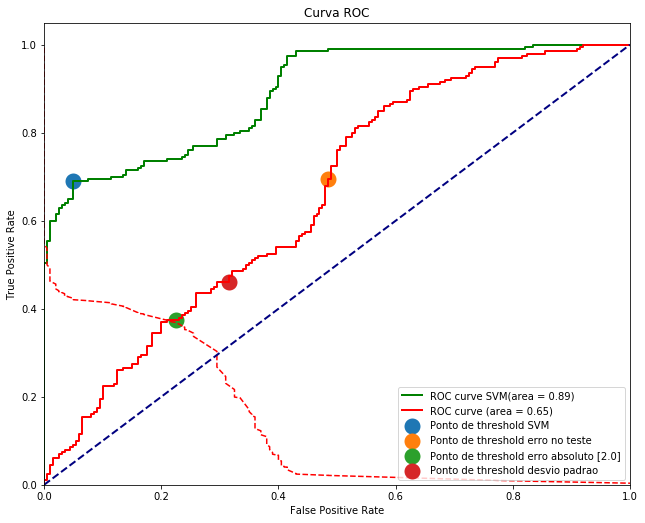

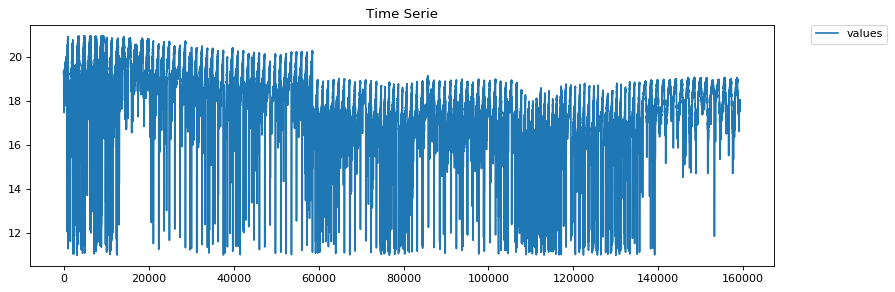

('sensor : ', '801g-pressao_alta-reno-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 1.0, 'classify__gamma': 0.1}


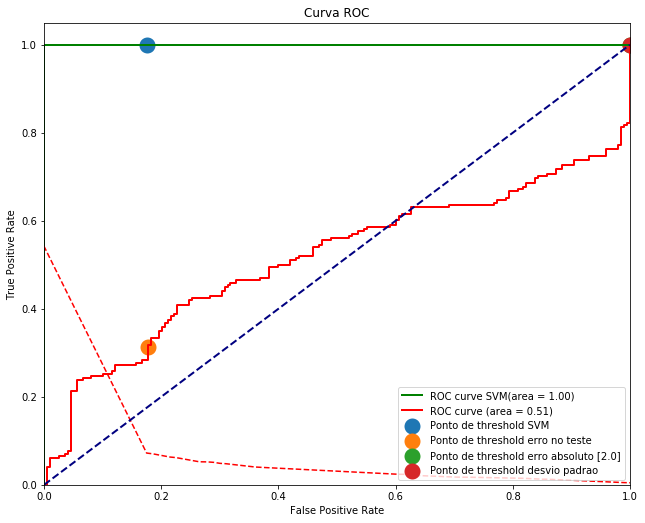

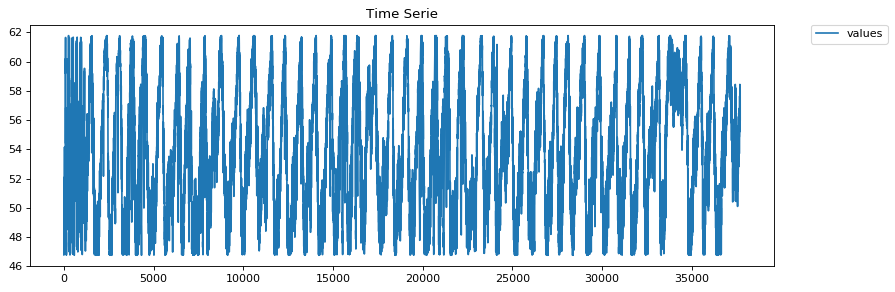

('sensor : ', '830g-pressao_baixa-santa-izabel-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


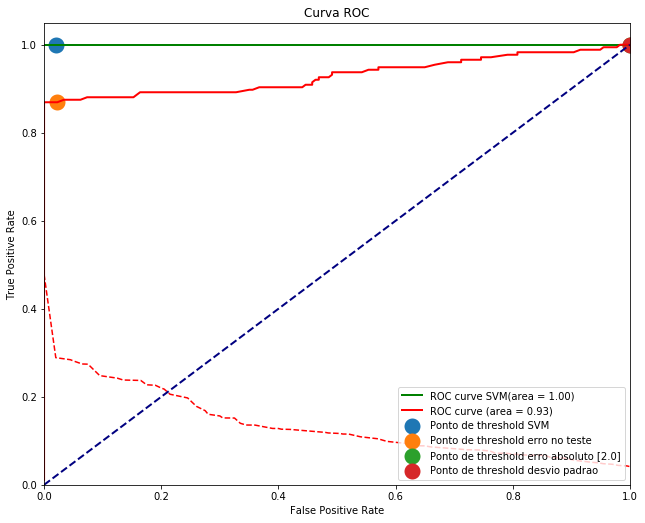

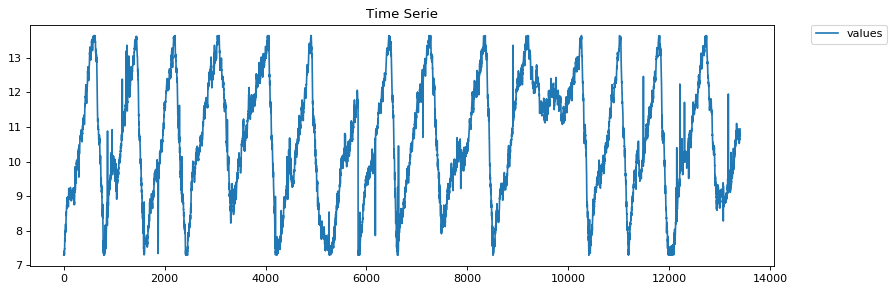

('sensor : ', '831g-pressao_alta-santa-izabel-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


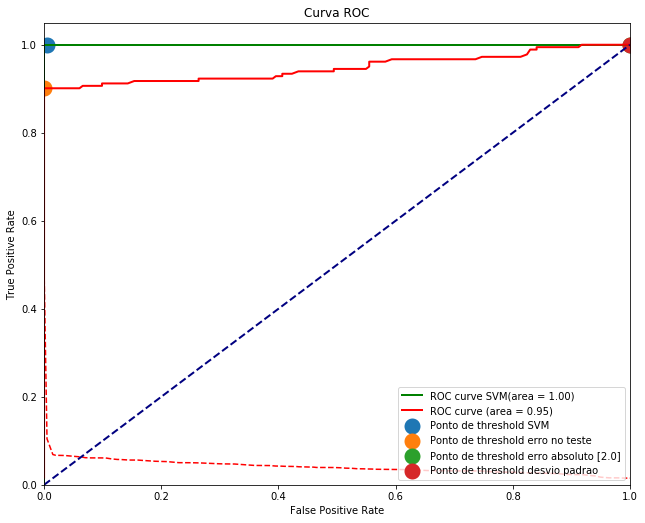

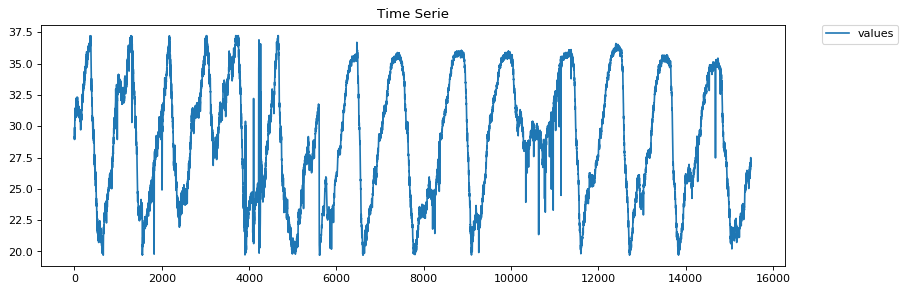

In [3]:
# Analise ROC para abordagem one-way

observed_window = 420
horizon = 30
# treinando e avaliando modelo para deteccao dos ruidos

accuracies=[]
precisions=[]

for i in range(0, len(dataframes_ruidos)):
    scaler =  StandardScaler()
    # normalizando datasets
    #datasetLstm = scaler.fit_transform(dataframes[i])
    #datasetLstm_ruido = scaler2.fit_transform(dataframes_ruidos[i])
    datasetLstm = scaler.fit_transform(dataframes[i])
    datasetLstm_ruido = scaler.fit_transform(dataframes_ruidos[i])
    
    # gerando datasets de treino/teste (com/sem ruido)
    train_data_lstm, test_data_lstm,y_seq_data_lstm = generate_datasets(datasetLstm,look_back = 420,pred_horizon=30)

    trainXlstm, trainYlstm = train_data_lstm[0], train_data_lstm[1]
    testXlstm, testYlstm   = test_data_lstm[0], test_data_lstm[1]
    
    # mudando formato para [exemplos, time steps, features]
    trainXlstm = np.reshape(trainXlstm, (trainXlstm.shape[0], 1, trainXlstm.shape[1]))
    testXlstm = np.reshape(testXlstm, (testXlstm.shape[0], 1, testXlstm.shape[1]))

    print("sensor : ", sensores[i])
    print("training lstm")
    # criando modelo lstm
    threshold, model = fit_lstm(trainXlstm,trainYlstm,testXlstm,y_seq_data_lstm,scaler)
    
    
    train_size = int(len(datasetLstm) * 0.8)
    data_matrix_real = datasetLstm[train_size:]
    data_matrix_ruido = datasetLstm_ruido
    inicio_ruido = inicios_ruidos[i]
    inicio_sem_ruido = inicios_sem_ruidos[i]
    
    print("obtendo predicoes nas zonas de ruidos e nao ruidos ...")
    # avaliando modelo para detecao dos ruidos
    forecasts, ruido_and_real_values = get_forecasts(model,data_matrix_real, data_matrix_ruido, inicio_sem_ruido, inicio_ruido, observed_window, horizon)
    
    forecasts  = scaler.inverse_transform(forecasts)
    ruido_and_real_values = scaler.inverse_transform(ruido_and_real_values)
    
    # analise das predicoes nos ruidos
    errors = [mean_squared_error(ruido_and_real_values[idx], forecasts[idx]) for idx in range(len(forecasts))]
    # labels dos valores (true,false)
    target = np.ones((len(forecasts)), dtype=bool)
    target[len(forecasts)/2:] = False
    
    # construindo a curva
    fpr, tpr, _ = roc_curve(target, errors)
    roc_auc = auc(fpr, tpr)
    error_found=[]
    desvio_error_found=[]
    desvio = np.std(dataframes[i][:train_size])
    
    # calculando falso-positivos, verdadeiro-positivos ,etc
    TP,TN,FP,FN                 = calculate_metrics(errors,threshold)
    TP_abs,TN_abs,FP_abs,FN_abs = calculate_metrics(errors,2.0)
    TP_std,TN_std,FP_std,FN_std = calculate_metrics(errors,desvio)
    
                
    TPR_error_approach = TP/(TP+FN)
    FPR_error_approach = FP/(TN+FP)
    TPR_abs_approach = TP_abs/(TP_abs+FN_abs)
    FPR_abs_approach = FP_abs/(TN_abs+FP_abs)
    TPR_std_approach = TP_std/(TP_std+FN_std)
    FPR_std_approach = FP_std/(TN_std+FP_std)
    
    # treinando svm
    clf = train_model_noise_detection(dataframes[i])
    
    # avaliando o modelo e retornando :
    #   - false-positive-rate
    #   - true-positive-rate
    #   - AUC (area under roc)
    
    fpr_svm, tpr_svm, roc_auc_svm, svm_fpr, svm_tpr, thresholds_svm = evaluate_model(clf, dataframes[i],dataframes_ruidos[i],inicios_ruidos[i],inicios_sem_ruidos[i])
    
    
    plt.figure()
    lw = 2
    plt.figure(figsize=(10.5, 8.5))
    
    plt.plot(fpr_svm, tpr_svm, color='green',
         lw=lw, label='ROC curve SVM(area = %0.2f)' % roc_auc_svm)
    plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    
    plt.plot(fpr_svm, thresholds_svm, color='red', markeredgecolor='r',linestyle='dashed')
     
    plt.scatter(svm_fpr, svm_tpr,  marker='o', linewidths=10.0, 
                label='Ponto de threshold SVM')
    
    plt.scatter(FPR_error_approach, TPR_error_approach,  marker='o', linewidths=10.0, 
                label='Ponto de threshold erro no teste')
    
    plt.scatter(FPR_abs_approach, TPR_abs_approach,  marker='o', linewidths=10.0, 
                label='Ponto de threshold erro absoluto [2.0]')
    
    plt.scatter(FPR_std_approach, TPR_std_approach,  marker='o', linewidths=10.0, 
                label='Ponto de threshold desvio padrao')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    
    plt.show()
    
    plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(dataframes[i],label='values')
    plt.title('Time Serie')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    

('sensor : ', '690g-pressao_entrada-vila-aurea-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


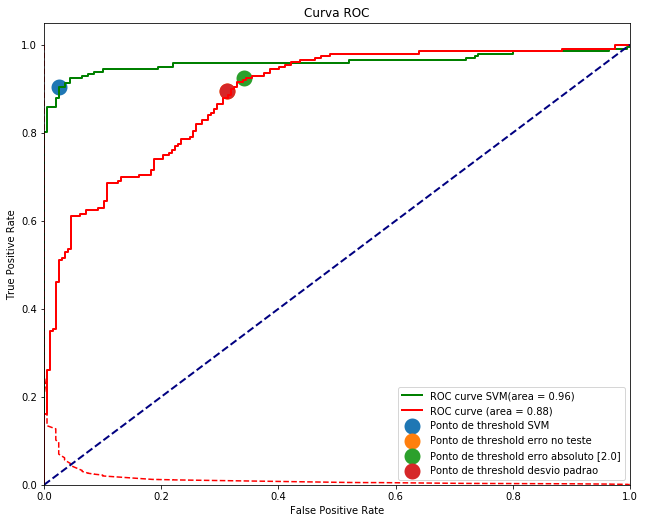

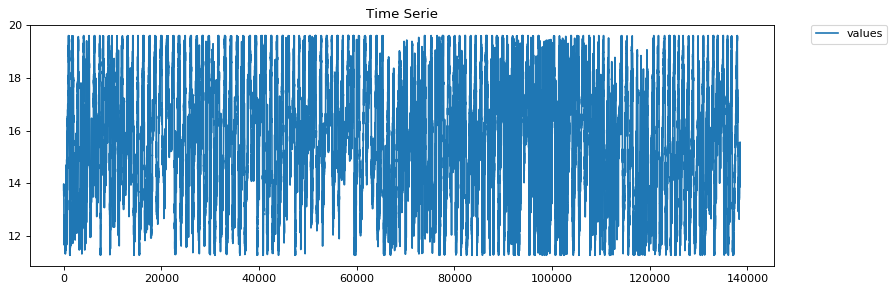

('sensor : ', '735g-pressao_media-vila-aurea-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


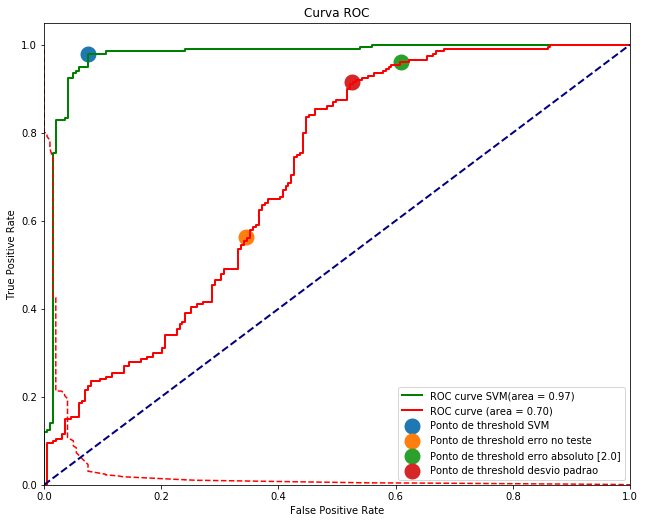

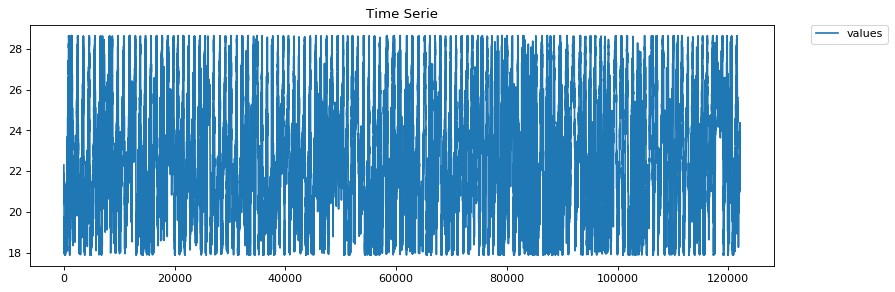

('sensor : ', '605g-pressao_alta-vila-aurea-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


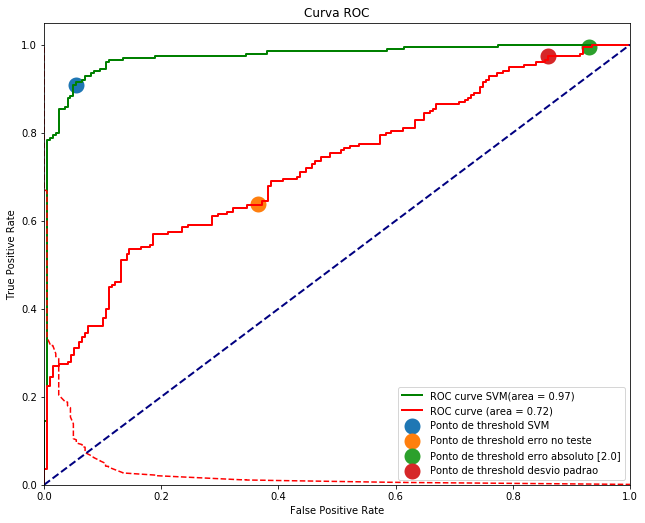

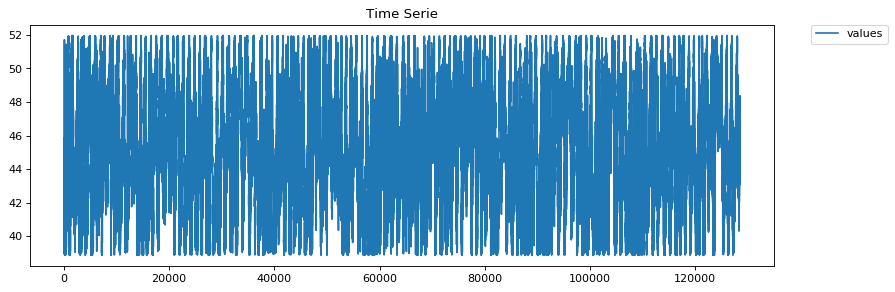

('sensor : ', '589g-pressao_alta-andreazza-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 1.0, 'classify__gamma': 0.1}


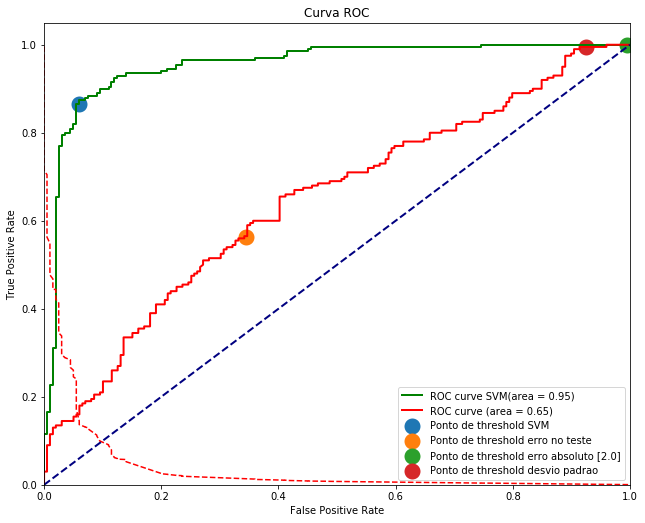

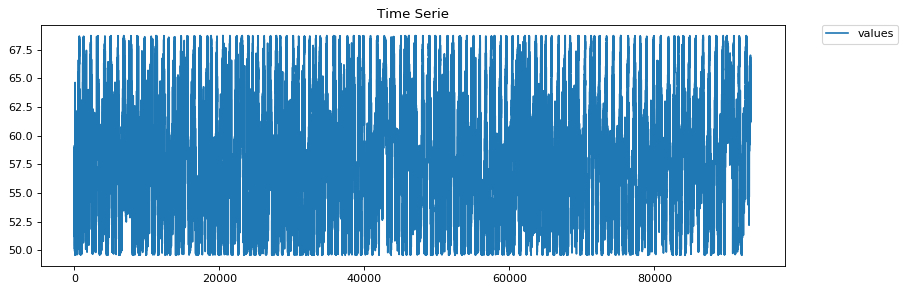

('sensor : ', '631g-pressao_ponto_critico-andreazza-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 1.0, 'classify__gamma': 0.1}


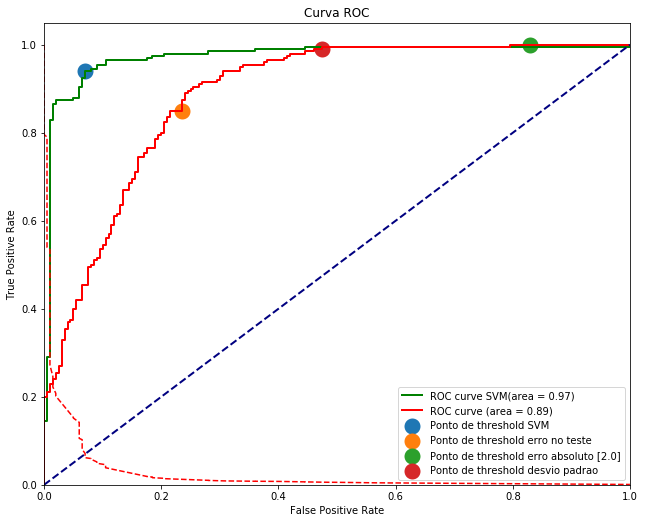

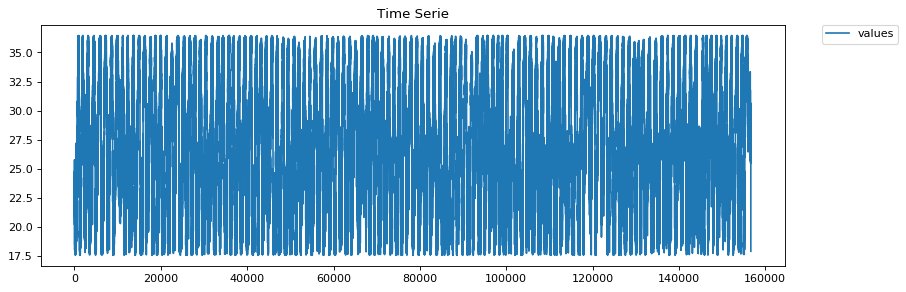

('sensor : ', '678g-pressao_entrada-andreazza-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 1.0, 'classify__gamma': 0.1}


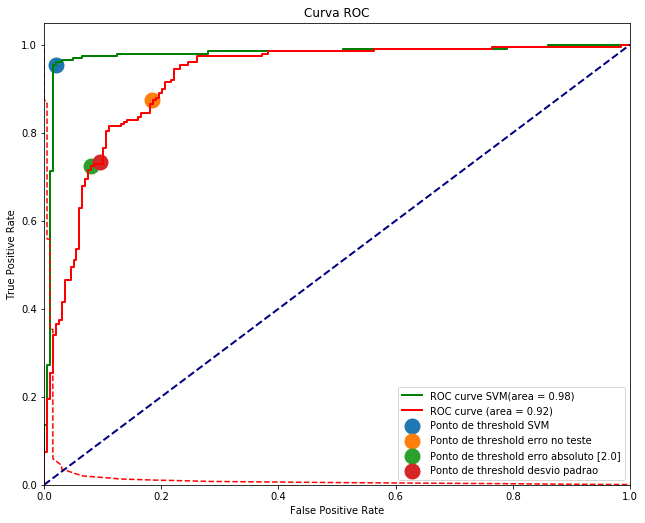

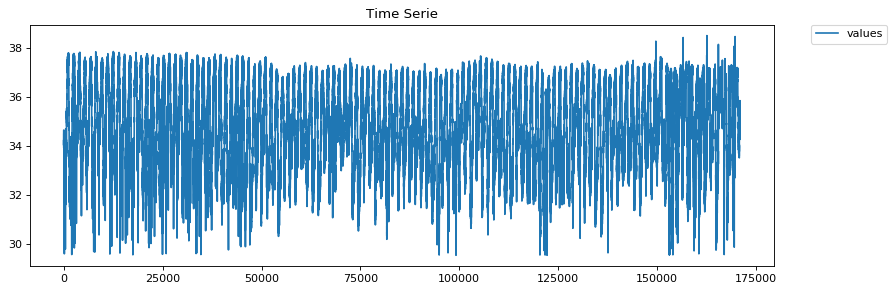

('sensor : ', '690a-vazao-vila-aurea-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


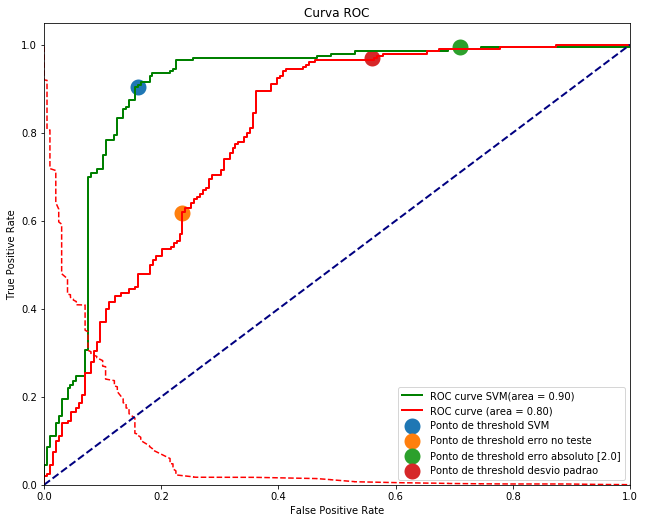

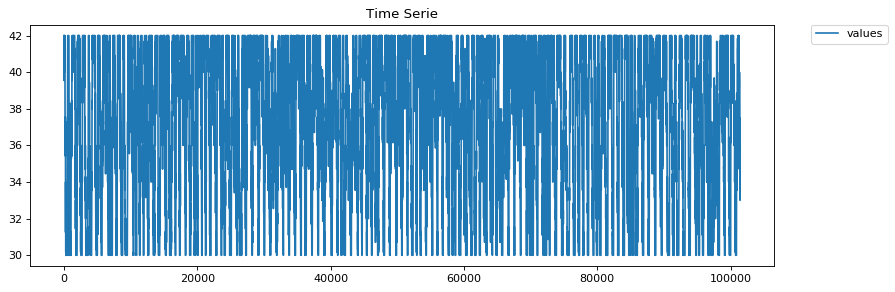

('sensor : ', '450a-vazao-santa-izabel-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


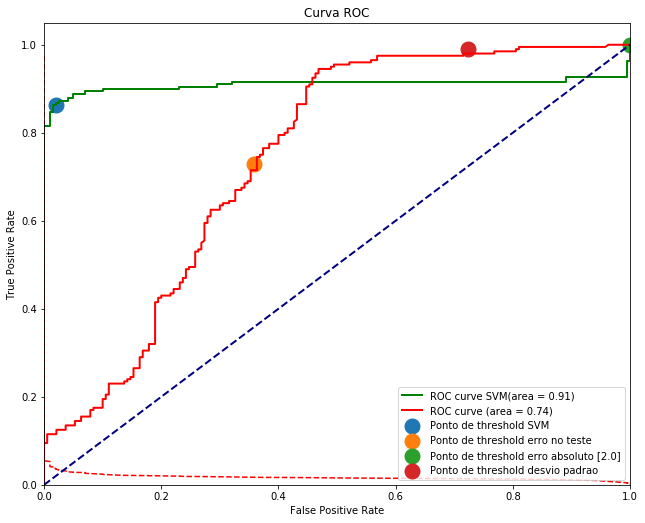

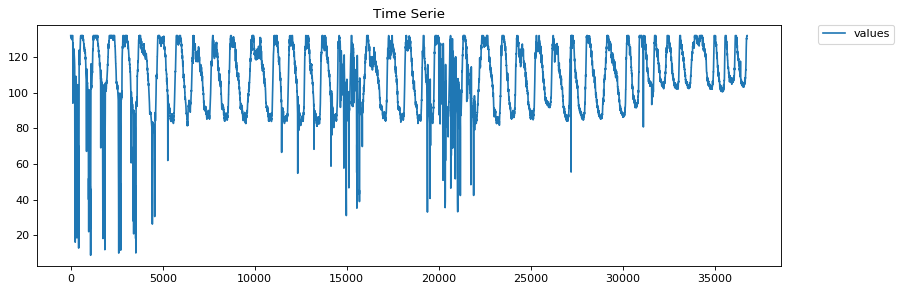

('sensor : ', '450g-pressao_entrada-santa-izabel-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 1.0, 'classify__gamma': 0.1}


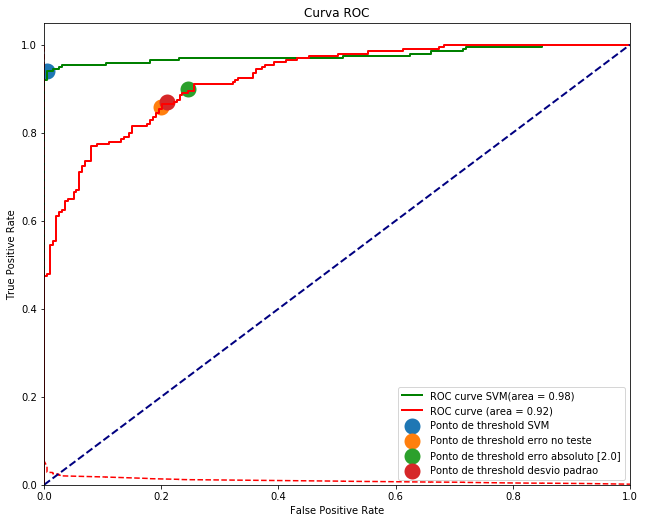

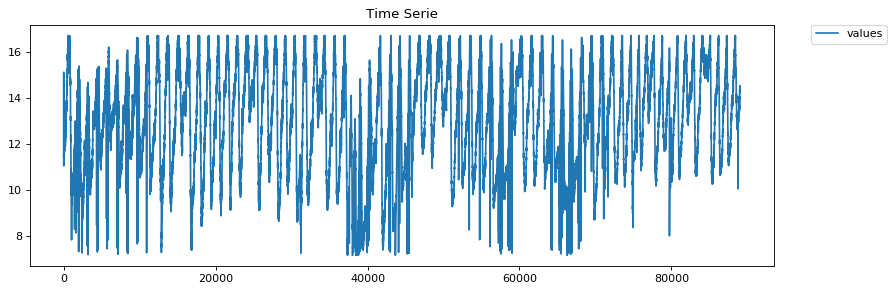

('sensor : ', '485b-vazao-reno-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


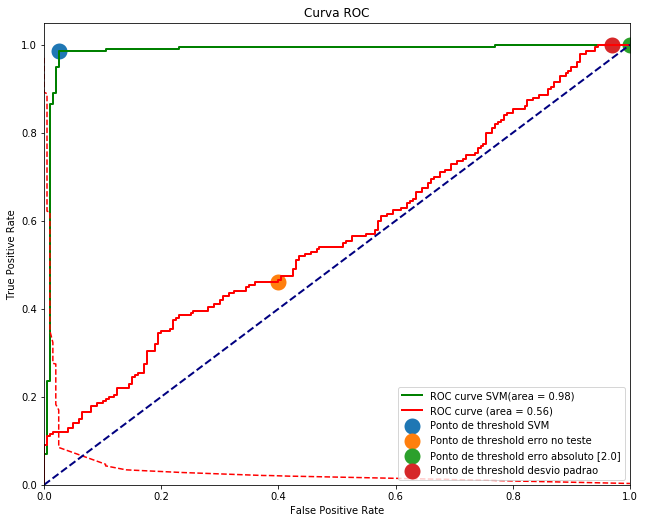

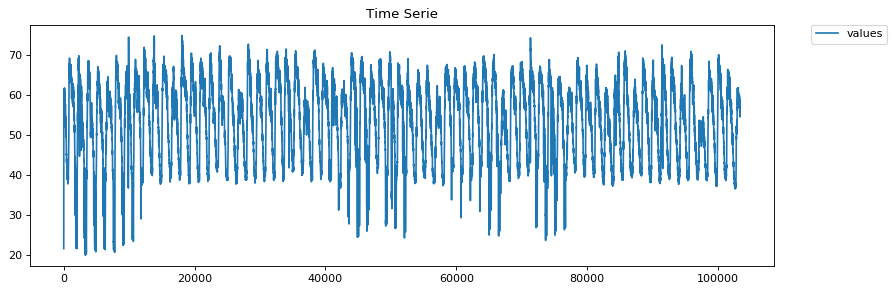

('sensor : ', '485g-pressao_entrada-reno-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 1.0, 'classify__gamma': 0.1}


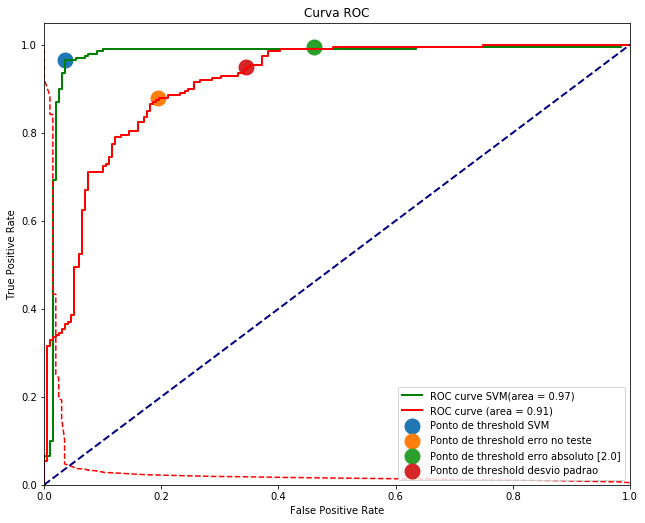

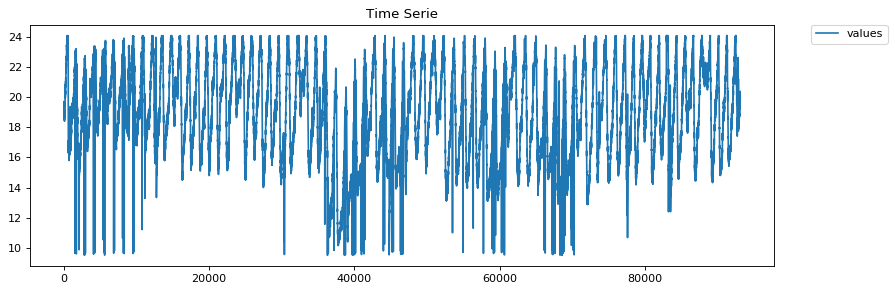

('sensor : ', '525g-pressao_baixa-reno-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


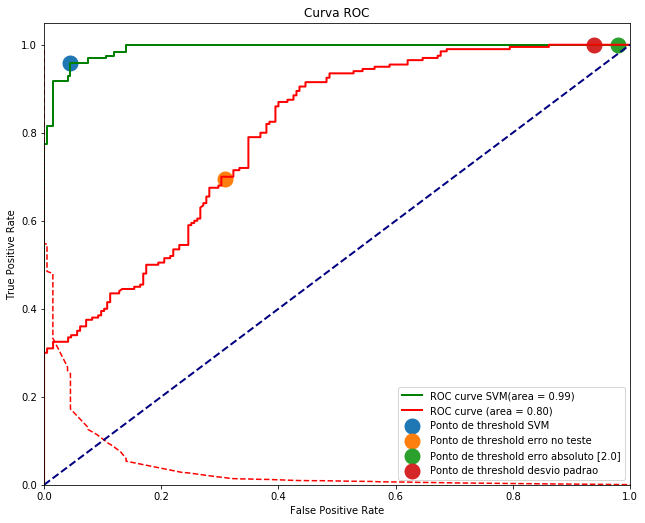

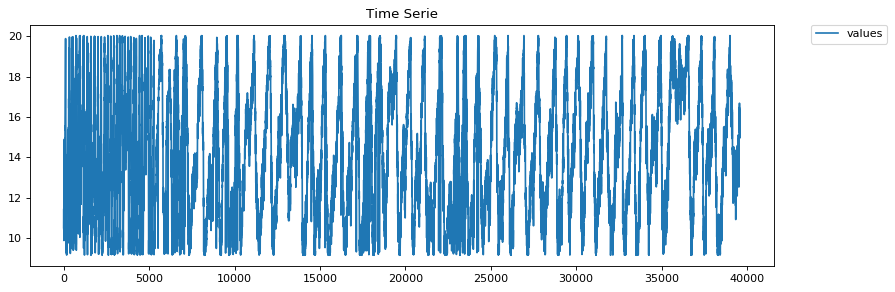

('sensor : ', '573g-pressao_alta-aeroporto-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


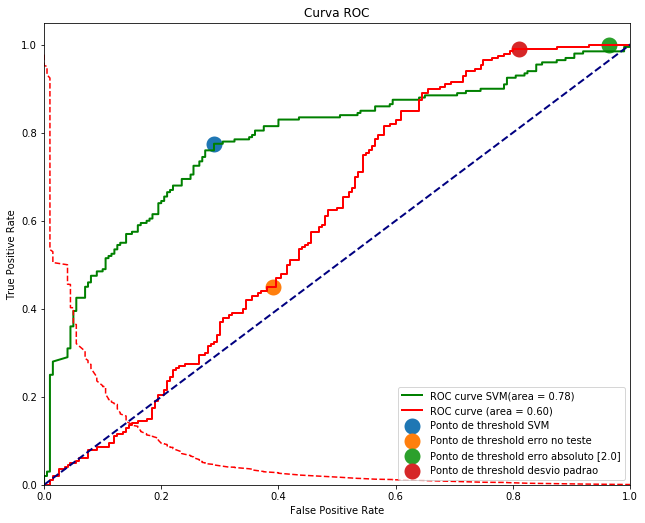

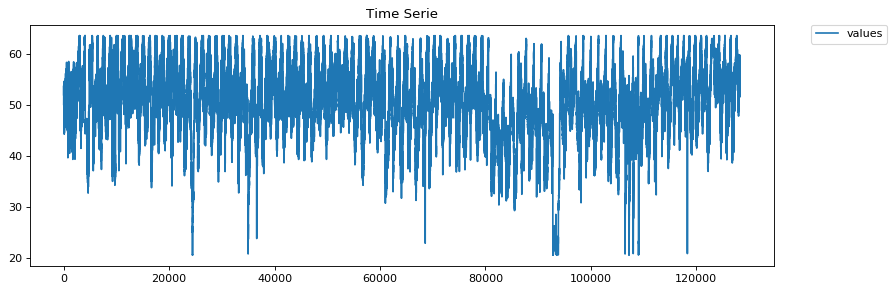

('sensor : ', '635g-pressao_ponto_critico-aeroporto-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 1.0, 'classify__gamma': 0.1}


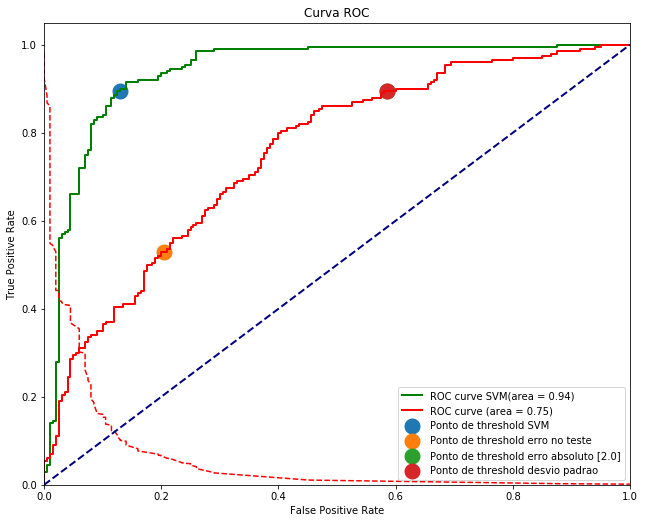

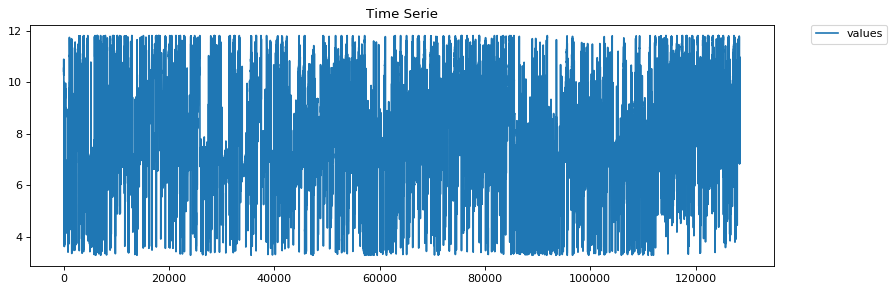

('sensor : ', '781a-vazao-aeroporto-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


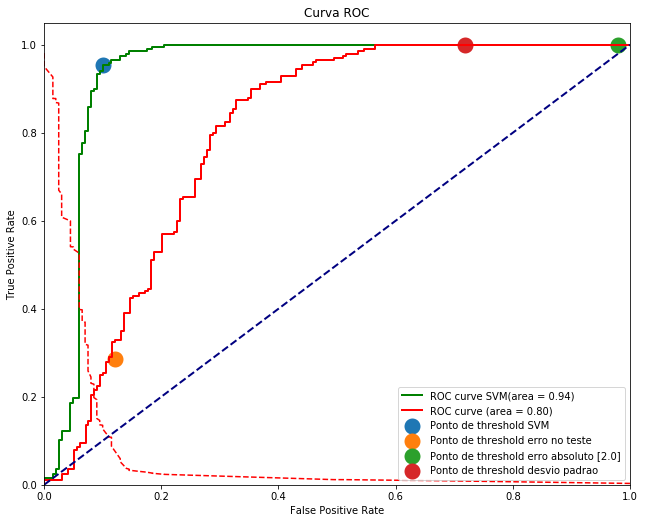

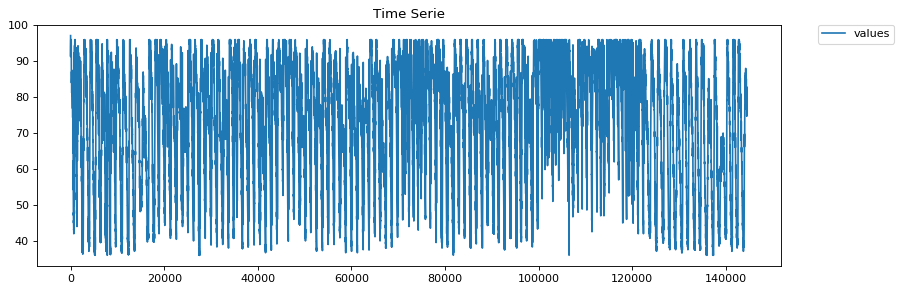

('sensor : ', '781g-pressao_entrada-aeroporto-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


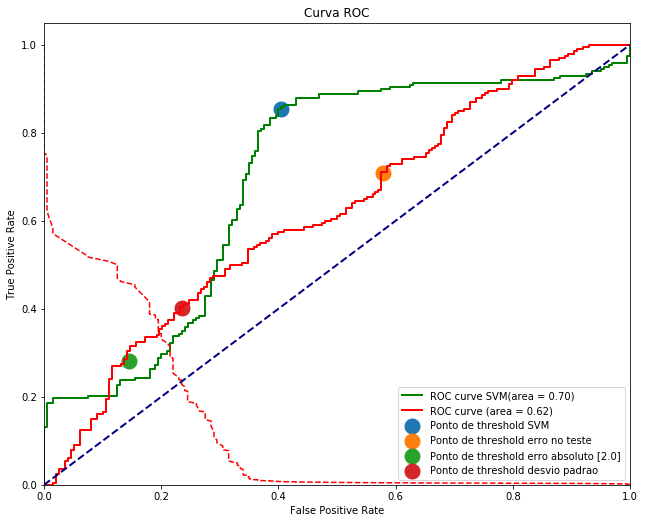

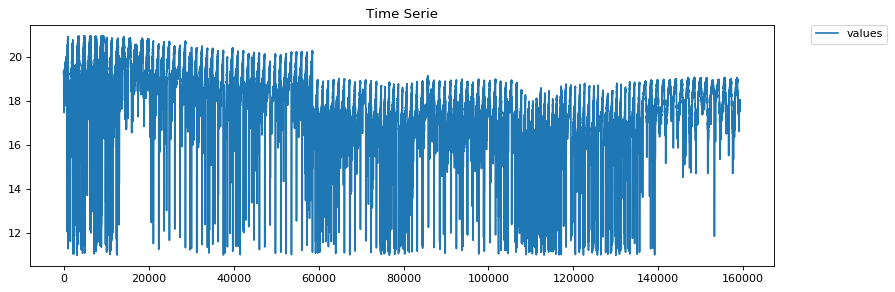

('sensor : ', '801g-pressao_alta-reno-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


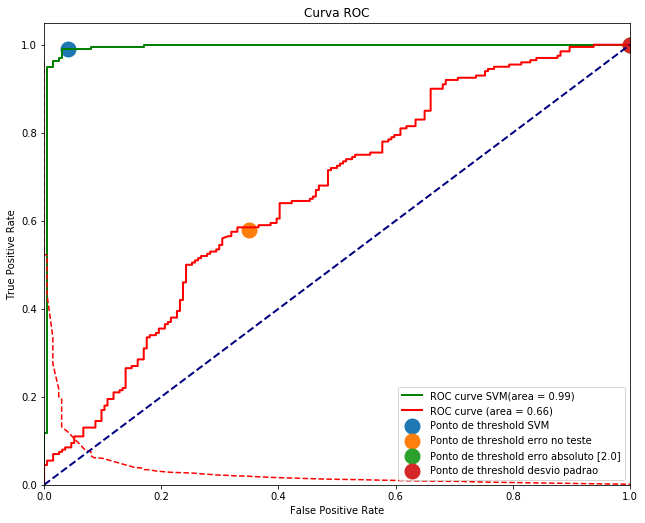

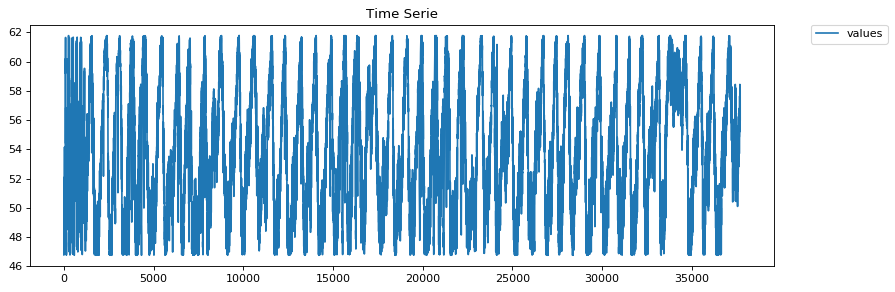

('sensor : ', '830g-pressao_baixa-santa-izabel-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


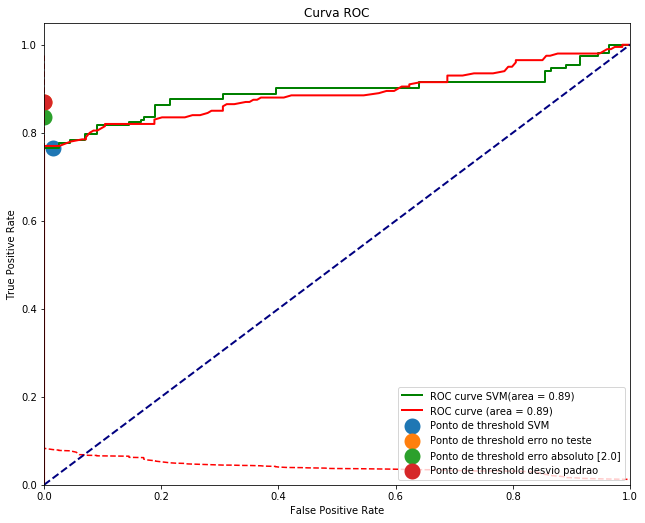

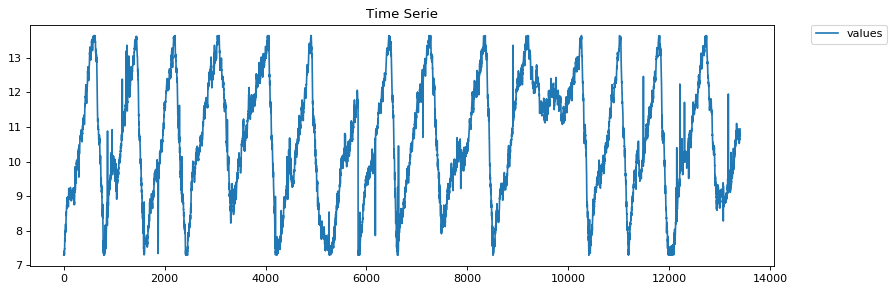

('sensor : ', '831g-pressao_alta-santa-izabel-20-04-2016.csv')
training lstm
definindo threshold ...
obtendo predicoes nas zonas de ruidos e nao ruidos ...
{'classify__C': 10, 'classify__gamma': 0.1}


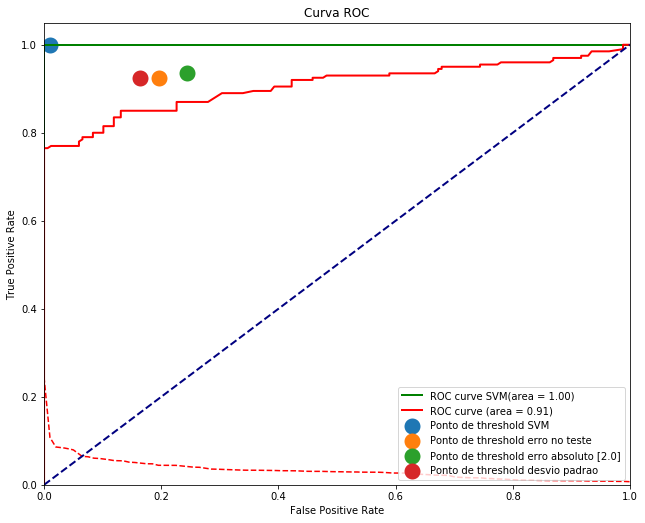

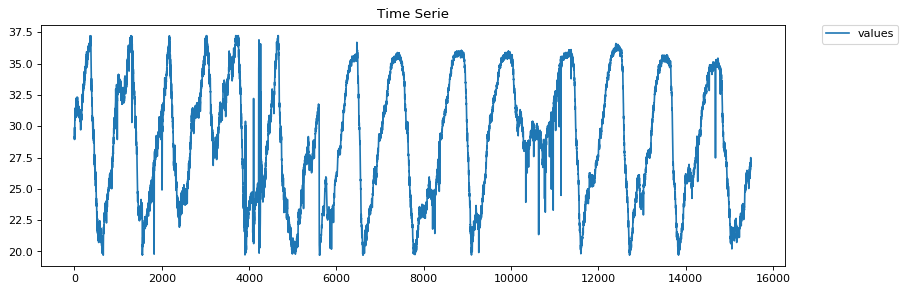

In [4]:
# Analise ROC para abordagem two-way

observed_window = 420
horizon = 30
# treinando e avaliando modelo para deteccao dos ruidos

accuracies=[]
precisions=[]

for i in range(0, len(dataframes_ruidos2)):
    scaler =  StandardScaler()
    #scaler2 = MinMaxScaler(feature_range=(0, 1))
    # normalizando datasets
    #datasetLstm = scaler.fit_transform(dataframes[i])
    #datasetLstm_ruido = scaler2.fit_transform(dataframes_ruidos2[i])
    datasetLstm = scaler.fit_transform(dataframes[i])
    datasetLstm_ruido = scaler.fit_transform(dataframes_ruidos2[i])
    
    # gerando datasets de treino/teste (com/sem ruido)
    train_data_lstm, test_data_lstm,y_seq_data_lstm = generate_datasets(datasetLstm,look_back = 420,pred_horizon=30)

    trainXlstm, trainYlstm = train_data_lstm[0], train_data_lstm[1]
    testXlstm, testYlstm   = test_data_lstm[0], test_data_lstm[1]
    
    
    # mudando formato para [exemplos, time steps, features]
    trainXlstm = np.reshape(trainXlstm, (trainXlstm.shape[0], 1, trainXlstm.shape[1]))
    testXlstm = np.reshape(testXlstm, (testXlstm.shape[0], 1, testXlstm.shape[1]))

    print("sensor : ", sensores[i])
    print("training lstm")
    # criando modelo lstm
    threshold, model = fit_lstm(trainXlstm,trainYlstm,testXlstm,y_seq_data_lstm,scaler)
    
    train_size = int(len(datasetLstm) * 0.8)
    data_matrix_real = datasetLstm[train_size:]
    data_matrix_ruido = datasetLstm_ruido
    inicio_ruido = inicios_ruidos2[i]
    inicio_sem_ruido = inicios_sem_ruidos2[i]
    
    print("obtendo predicoes nas zonas de ruidos e nao ruidos ...")
    # avaliando modelo para detecao dos ruidos
    forecasts, ruido_and_real_values = get_forecasts(model,data_matrix_real, data_matrix_ruido, inicio_sem_ruido, inicio_ruido, observed_window, horizon)
    
    forecasts  = scaler.inverse_transform(forecasts)
    ruido_and_real_values = scaler.inverse_transform(ruido_and_real_values)
    
    # analise das predicoes nos ruidosStandardScaler()
    errors = [mean_squared_error(ruido_and_real_values[idx], forecasts[idx]) for idx in range(len(forecasts))]
    # labels dos valores (true,false)
    target = np.ones((len(forecasts)), dtype=bool)
    target[len(inicio_ruido):] = False
    
    # construindo a curva
    fpr, tpr, _ = roc_curve(target, errors)
    roc_auc = auc(fpr, tpr)
    error_found=[]
    desvio_error_found=[]
    desvio = np.std(dataframes[i][:train_size])
    
    # calculando fp,tn, etc
    TP,TN,FP,FN                 = calculate_metrics(errors,threshold)
    TP_abs,TN_abs,FP_abs,FN_abs = calculate_metrics(errors,2.0)
    TP_std,TN_std,FP_std,FN_std = calculate_metrics(errors,desvio)
    
                
    TPR_error_approach = TP/(TP+FN)
    FPR_error_approach = FP/(TN+FP)
    TPR_abs_approach = TP_abs/(TP_abs+FN_abs)
    FPR_abs_approach = FP_abs/(TN_abs+FP_abs)
    TPR_std_approach = TP_std/(TP_std+FN_std)
    FPR_std_approach = FP_std/(TN_std+FP_std)
    
    # treinando svm
    clf = train_model_noise_detection(dataframes[i])
    
    # avaliando o modelo e retornando :
    #   - false-positive-rate
    #   - true-positive-rate
    #   - AUC (area under roc)
    #
    
    fpr_svm, tpr_svm, roc_auc_svm, svm_fpr, svm_tpr,thresholds_svm = evaluate_model(clf, dataframes[i],dataframes_ruidos2[i],inicios_ruidos2[i],inicios_sem_ruidos2[i])
    
    plt.figure()
    lw = 2
    plt.figure(figsize=(10.5, 8.5))
    plt.plot(fpr_svm, tpr_svm, color='green',
         lw=lw, label='ROC curve SVM(area = %0.2f)' % roc_auc_svm)
    plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr_svm, thresholds_svm, color='red', markeredgecolor='r',linestyle='dashed')
     
    plt.scatter(svm_fpr, svm_tpr,  marker='o', linewidths=10.0, 
                label='Ponto de threshold SVM')
    
    plt.scatter(FPR_error_approach, TPR_error_approach,  marker='o', linewidths=10.0, 
                label='Ponto de threshold erro no teste')
    
    plt.scatter(FPR_abs_approach, TPR_abs_approach,  marker='o', linewidths=10.0, 
                label='Ponto de threshold erro absoluto [2.0]')
    
    plt.scatter(FPR_std_approach, TPR_std_approach,  marker='o', linewidths=10.0, 
                label='Ponto de threshold desvio padrao')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    
    plt.show()
    
    plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(dataframes[i],label='values')
    plt.title('Time Serie')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()